# Instacart Analysis 

## Table of Contents
* [Exercise 1.1](#Exercise-1.1) 
    * [Importing Libraries and CSV File](#Importing-Libraries-and-CSV-File)
* [Exercise 1.2](#Exercise-1.2)
    * [Dealing with PII](#Dealing-with-PII)
* [Exercise 1.3](#Exercise-1.3)
    * [Creating a region based on state column](#Creating-a-region-based-on-state-column)
    * [Checking difference in spending habits between different U.S. regions](#Checking-difference-in-spending-habits-between-different-U.S.-regions)
* [Exercise 1.4](#Exercise-1.4)
    * [Creating exclusion flag for low activity customers](#Creating-exclusion-flag-for-low-activity-customers)
* [Exercise 1.5](#Exercise-1.5)
    * [Creating a profiling variable](#Creating-a-profiling-variable)
* [Exercise 1.6](#Exercise-1.6)
    * [Creating Visualization for Customer Profiles](#Creating-Visualization-for-Customer-Profiles)
* [Exercise 1.7](#Exercise-1.7)
    * [Descriptive statistics for customer profile](#Descriptive-statistics-for-customer-profile)
* [Exercise 1.8 & 1.9](#Exercise-1.8-&-1.9)
    * [Comparing customer profiles with regions and departments](#Comparing-customer-profiles-with-regions-and-departments)
        * [Comparing customer profile with region](#Comparing-customer-profile-with-region)
        * [Comparing customer profile with region (normalized)](#Comparing-customer-profile-with-region-(normalized))
        * [Comparing customer profile with department](#Comparing-customer-profile-with-department)
        * [Comparing customer profile with department (normalized)](#Comparing-customer-profile-with-department-(normalized))
* [Exercise 1.10](#Exercise-1.10)
    * [Exporting data frame](#Exporting-data-frame)

# Exercise 1.1 

# Importing Libraries and CSV File

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Filter out warnings so not seen in output when working on slice of df
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing ords_prods_all file
ords_prods_all = pd.read_pickle(r'/Users/suzandiab/Documents/Instacart Basket Analysis/02 Data/Prepared Data/ords_prods_all.pkl')

# Exercise 1.2

# Dealing with PII

In [4]:
# Displaying columns of df to identify personally identifiable information 
ords_prods_all.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_last_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'avg_price_all_orders', 'spending_flag', 'median_days_last_order',
       'frequency_flag', 'first_name', 'last_name', 'gender', 'state', 'age',
       'date_joined', 'number_of_dependents', 'family_status', 'income',
       '_merge'],
      dtype='object')

In [5]:
# Dropping first and last name columns
ords_prods_all.drop(columns = ['first_name', 'last_name'])

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,...,median_days_last_order,frequency_flag,gender,state,age,date_joined,number_of_dependents,family_status,income,_merge
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32404854,156685,106143,26,4,23,5.0,19675,1,1,Organic Raspberry Black Tea,...,7.0,Frequent customer,Male,Hawaii,25,5/26/2017,0,single,53755,both
32404855,484769,66343,1,6,11,NaN,47210,1,0,Fresh Farmed Tilapia Fillet,...,30.0,Non-frequent customer,Female,Tennessee,22,9/12/2017,3,married,46151,both
32404856,1561557,66343,2,1,11,30.0,47210,1,1,Fresh Farmed Tilapia Fillet,...,30.0,Non-frequent customer,Female,Tennessee,22,9/12/2017,3,married,46151,both
32404857,276317,66343,3,6,15,19.0,47210,1,1,Fresh Farmed Tilapia Fillet,...,30.0,Non-frequent customer,Female,Tennessee,22,9/12/2017,3,married,46151,both


In [6]:
# Overwriting data frame without first and last name columns
ords_prods_all = ords_prods_all.drop(columns = ['first_name', 'last_name'])

# Exercise 1.3

# Creating a region column based on state column

In [7]:
# Creating new "region" column using for-loop

result = []

for value in ords_prods_all['state']:
    if value in ('Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 
                 'Pennsylvania', 'New Jersey'):
        result.append('Northeast')
    elif value in ('Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota' , 'South Dakota', 'Nebraska', 
                   'Kansas', 'Minnesota', 'Iowa', 'Missouri'):
        result.append('Midwest')
    elif value in ('Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 
                   'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 
                   'Oklahoma', 'Texas', 'Arkansas', 'Louisiana'):
        result.append('South')
    elif value in ('Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 
                   'Washington', 'Oregon', 'California', 'Hawaii'):
        result.append('West')
    else:
        result.append('Unknown')    

In [8]:
# printing result
result

['South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 '

In [9]:
# Combining results with the ords_prods_all dataframe
ords_prods_all['region'] = result

In [10]:
# Checking values for accuracy
ords_prods_all['region'].value_counts(dropna = False)

region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

In [11]:
# Checking first 5 rows to check if new column was added
ords_prods_all.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,...,frequency_flag,gender,state,age,date_joined,number_of_dependents,family_status,income,_merge,region
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South


# Checking difference in spending habits between the different U.S. regions

In [12]:
# Crossing region variable with spending flag
crosstab = pd.crosstab(ords_prods_all['region'], ords_prods_all['spending_flag'], dropna = False)

In [13]:
# Displaying crosstab
crosstab

spending_flag,High spender,Low spender
region,,
Midwest,29265,7568060
Northeast,18642,5704094
South,40564,10751321
West,31223,8261690


In [14]:
# Calculating the percentages of each spending habit in regard to the total within each region (normalizing)
result_percent = crosstab.div(crosstab.sum(axis=1), axis=0) * 100

In [15]:
# Printing percentages 
result_percent

spending_flag,High spender,Low spender
region,,
Midwest,0.385201,99.614799
Northeast,0.325753,99.674247
South,0.375875,99.624125
West,0.376502,99.623498


Essentially no difference in spending habits between the regions. 

# Exercise 1.4

# Creating exclusion flag for low activity customers

In [16]:
# Creating exclusion flag

ords_prods_all['exclusion_flag'] = np.where(ords_prods_all['max_order'] < 5, 'Yes', 'No')

In [17]:
# Checking new exclusion column
ords_prods_all.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,...,gender,state,age,date_joined,number_of_dependents,family_status,income,_merge,region,exclusion_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,No
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,No
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,No
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,No
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,No


In [18]:
# Creating a df for customers with less than 5 orders

ords_prods_all_exclusion = ords_prods_all[ords_prods_all['exclusion_flag'] == 'Yes']

In [19]:
# Checking new dimensions of this df to see that some rows were removed
ords_prods_all_exclusion.shape

(1440295, 33)

In [20]:
# Exporting this df sample with customers who ordered less than 5 times
ords_prods_all_exclusion.to_pickle(r'/Users/suzandiab/Documents/Instacart Basket Analysis/02 Data/Prepared Data/customers_less_5_orders.pkl')

In [21]:
# Creating new data frame that only includes customers with more than 5 orders
ords_prods_all_high_activity = ords_prods_all[ords_prods_all['exclusion_flag'] != 'Yes']

In [22]:
# Checking values 
ords_prods_all_high_activity['exclusion_flag'].value_counts(dropna = False)

exclusion_flag
No    30964564
Name: count, dtype: int64

We can see that this data frame only includes customers with more than 5 orders, hence the "no" values.

# Exercise 1.5

# Creating a profiling variable

In [23]:
# Creating a subset of df with only distinct user_ids to create customer profiles 
ords_prods_distinct = ords_prods_all_high_activity.groupby('user_id').first()

In [24]:
# Assigning young single adult to the customer profile column according to the filter
ords_prods_distinct.loc[
    (ords_prods_distinct['age'] >= 18) & \
    (ords_prods_distinct['age'] <= 25) & \
    (ords_prods_distinct['income'] >= 25903) & \
    (ords_prods_distinct['number_of_dependents'] == 0) & \
    (ords_prods_distinct['family_status'].isin(['single'])),
    'customer_profiles'] = 'Young Single Adult'

In [25]:
# Assigning young married parents to the customer profile column according to the filter
ords_prods_distinct.loc[
    (ords_prods_distinct['age'] >= 18) & \
    (ords_prods_distinct['age'] <= 30) & \
    (ords_prods_distinct['income'] >= 25903) & \
    (ords_prods_distinct['number_of_dependents'] >= 1) & \
    (ords_prods_distinct['family_status'].isin(['married'])),
    'customer_profiles'] = 'Young Married Parents'

In [26]:
# Assigning middle aged parents to the customer profile column according to the filter
ords_prods_distinct.loc[
    (ords_prods_distinct['age'] >= 31) & \
    (ords_prods_distinct['age'] <= 45) & \
    (ords_prods_distinct['income'] >= 25903) & \
    (ords_prods_distinct['number_of_dependents'] >= 1) & \
    (ords_prods_distinct['family_status'].isin(['married'])),
    'customer_profiles'] = 'Middle Aged Parents'

In [27]:
# Assigning affluent seniors to the customer profile column according to the filter
ords_prods_distinct.loc[
    (ords_prods_distinct['age'] >= 55) & \
    (ords_prods_distinct['income'] >= 160000) & \
    (ords_prods_distinct['number_of_dependents'] == 0) & \
    (ords_prods_distinct['family_status'].isin(['single', 'married','divorced/widowed'])),
    'customer_profiles'] = 'Affluent Seniors'

In [28]:
# Assigning missing values 
ords_prods_distinct['customer_profiles'] = \
    ords_prods_distinct['customer_profiles'].replace('nan', np. NaN)

In [29]:
# Checking values for customer profile column 
ords_prods_distinct['customer_profiles'].value_counts(dropna = False)

customer_profiles
NaN                      110484
Middle Aged Parents       28423
Young Married Parents     17035
Young Single Adult         5110
Affluent Seniors           1579
Name: count, dtype: int64

In [30]:
# Checking column was added 
ords_prods_distinct.head()

,order_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,...,state,age,date_joined,number_of_dependents,family_status,income,_merge,region,exclusion_flag,customer_profiles
user_id,,,,,,,,,,,,,,,,,,,,,
1,2539329,1,2,8,15.0,196,1,0,Soda,77,...,Alabama,31,2/17/2019,3,married,40423,both,South,No,Middle Aged Parents
10,68288,2,5,15,30.0,30489,29,0,Original Hummus,67,...,Florida,34,9/4/2018,2,married,52716,both,South,No,Middle Aged Parents
100,680467,1,3,18,30.0,27344,1,0,Uncured Genoa Salami,96,...,West Virginia,64,2/2/2020,2,married,138741,both,South,No,NaN
1000,3045856,1,0,14,17.0,37646,12,0,Organic Gala Apples,24,...,Oklahoma,25,1/7/2020,1,married,63581,both,South,No,Young Married Parents
10000,377814,10,1,6,3.0,13176,19,0,Bag of Organic Bananas,24,...,Arkansas,33,10/1/2018,0,single,61257,both,South,No,NaN


# Exercise 1.6

# Creating Visualization for Customer Profiles

In [31]:
# Defining customer profiles
customer_profile = ['Young Single Adult', 'Middle Aged Parents', 'Affluent Seniors', 'Young Married Parents']

In [32]:
# Counting the occurrences of each profile
profile_counts = ords_prods_distinct['customer_profiles'].value_counts().loc[customer_profile]

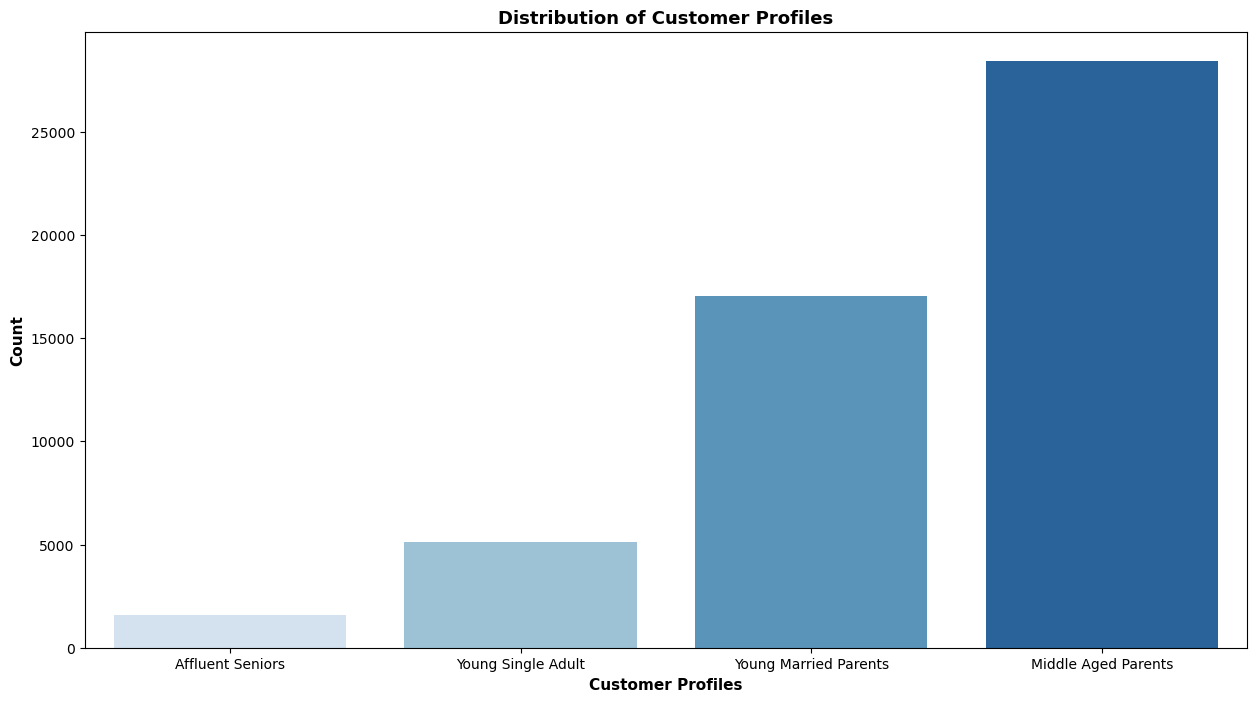

In [33]:
# Creating a bar chart to show the distribution of profiles
profile_counts_sorted = profile_counts.sort_values()
bar_distribution = plt.figure(figsize=(15, 8))
blue_palette = sns.color_palette("Blues", n_colors=len(profile_counts_sorted))
bar_plot = sns.barplot(x=profile_counts_sorted.index, y=profile_counts_sorted.values, palette=blue_palette)
plt.title('Distribution of Customer Profiles', fontweight = 'bold', fontsize=13)
plt.xlabel('Customer Profiles', fontweight = 'bold', fontsize=11)
plt.ylabel('Count', fontweight='bold', fontsize=11)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

The highest count of customer profiles is middle aged parents, with the lowest count comprising of affluent seniors.

In [34]:
# Exporting bar chart 
bar_distribution.savefig(r'/Users/suzandiab/Documents/Instacart Basket Analysis/04 Analysis/Visualizations/bar_customer_distribution.png', bbox_inches='tight')

# Exercise 1.7

# Descriptive statistics for customer profile

In [35]:
# Aggregate max, mean, and min variables for days since last order on a customer-profile level
ords_prods_distinct.groupby('customer_profiles').agg({'days_since_last_order': ['max', 'mean', 'min']})

days_since_last_order                
                                        max       mean  min
customer_profiles                                          
Affluent Seniors                       30.0  14.370488  0.0
Middle Aged Parents                    30.0  14.614221  0.0
Young Married Parents                  30.0  14.530379  0.0
Young Single Adult                     30.0  14.575342  0.0

In [36]:
# Aggregate max, mean, and min variables for prices on a customer-profile level
ords_prods_distinct.groupby('customer_profiles').agg({'prices': ['max', 'mean', 'min']})

prices               
                         max      mean  min
customer_profiles                          
Affluent Seniors        15.0  8.121089  1.0
Middle Aged Parents     23.2  7.809573  1.0
Young Married Parents   24.2  7.859342  1.0
Young Single Adult      23.2  7.882309  1.0

In regard to usage frequency, there is essentially no difference between the customer profiles. 
In regard to expenditure, we can see that affluent seniors, on average, spend a bit more than the younger age groups.

# Exercise 1.8 & 1.9

# Comparing customer profiles with regions and departments

## Comparing customer profile with region

In [37]:
# Group by 'customer_profiles' and 'region'
grouped_df = ords_prods_distinct.groupby(['region', 'customer_profiles']).size().unstack(fill_value=0)

In [38]:
# Sort the dataframe
sorted_df = grouped_df.loc[grouped_df.sum(axis=1).sort_values(ascending=False).index]  

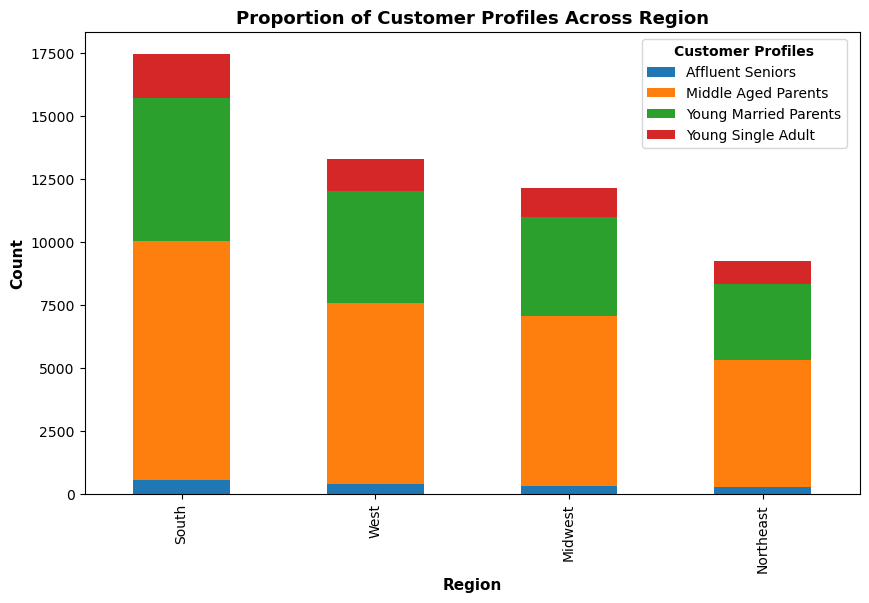

In [39]:
# Creating a stacked bar chart that displays the portion of each customer profile in each of the 4 regions
sorted_df.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Region', fontweight='bold', fontsize=11)
plt.ylabel('Count', fontweight='bold', fontsize=11)
plt.title('Proportion of Customer Profiles Across Region', fontweight='bold', fontsize=13)
legend = plt.legend(title='Customer Profiles', bbox_to_anchor=(0.71, 1), loc='upper left')
legend.get_title().set_fontweight('bold')
plt.savefig(r'/Users/suzandiab/Documents/Instacart Basket Analysis/04 Analysis/Visualizations/bar_customer_region.png',
            bbox_inches='tight')
plt.show()

We can see that middle aged parents have the highest population across all regions, followed by young married parents, young single adults, and then affluent seniors. 

## Comparing customer profile with region (normalized)

In [40]:
# Group by 'customer_profiles' and 'region'
grouped_df2 = ords_prods_distinct.groupby(['region', 'customer_profiles']).size().unstack(fill_value=0)

In [41]:
# Normalize each row to convert to percentage
normalized_df2 = grouped_df2.div(grouped_df2.sum(axis=1), axis=0) * 100

In [42]:
# Sort the dataframe
sorted_df2 = normalized_df2.loc[normalized_df2.sum(axis=1).sort_values(ascending=False).index]

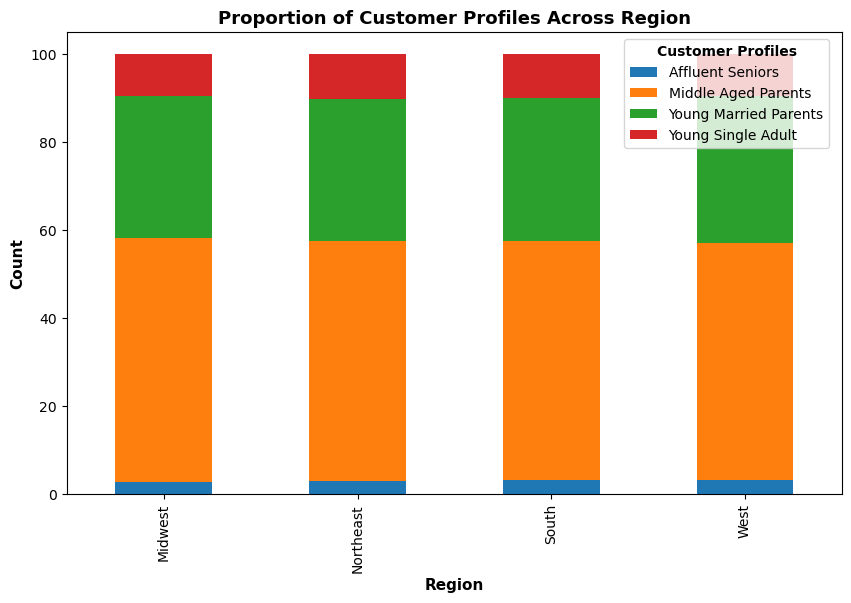

In [43]:
# Creating a stacked bar chart that displays the portion of each customer profile in each of the 4 regions
sorted_df2.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Region', fontweight='bold', fontsize=11)
plt.ylabel('Count', fontweight='bold', fontsize=11)
plt.title('Proportion of Customer Profiles Across Region', fontweight='bold', fontsize=13)
legend = plt.legend(title='Customer Profiles', bbox_to_anchor=(0.71, 1), loc='upper left')
legend.get_title().set_fontweight('bold')
plt.savefig(r'/Users/suzandiab/Documents/Instacart Basket Analysis/04 Analysis/Visualizations/bar_customer_region_norm.png',
            bbox_inches='tight')
plt.show()

No difference in customer profiles across different regions. 

## Comparing customer profile with department

In [44]:
# Merging subset of df with the customer profiles with entire df using user_id and customer_profiles
ords_prods_entire = ords_prods_all_high_activity.merge(ords_prods_distinct.reset_index()[['user_id', 'customer_profiles']], on='user_id')

In [45]:
# Creating a data dictionary to map the department names with their department ids
department_dictionary = {
    '1': 'frozen',
    '2': 'other',
    '3': 'bakery',
    '4': 'produce',
    '5': 'alcohol',
    '6': 'international',
    '7': 'beverages',
    '8': 'pets',
    '9': 'dry goods pasta',
    '10': 'bulk',
    '11': 'personal care',
    '12': 'meat seafood',
    '13': 'pantry',
    '14': 'breakfast',
    '15': 'canned goods',
    '16': 'dairy eggs',
    '17': 'household',
    '18': 'babies',
    '19': 'snacks',
    '20': 'deli',
    '21': 'missing'
}

In [46]:
# Display the data dictionary
department_dictionary

{'1': 'frozen',
 '2': 'other',
 '3': 'bakery',
 '4': 'produce',
 '5': 'alcohol',
 '6': 'international',
 '7': 'beverages',
 '8': 'pets',
 '9': 'dry goods pasta',
 '10': 'bulk',
 '11': 'personal care',
 '12': 'meat seafood',
 '13': 'pantry',
 '14': 'breakfast',
 '15': 'canned goods',
 '16': 'dairy eggs',
 '17': 'household',
 '18': 'babies',
 '19': 'snacks',
 '20': 'deli',
 '21': 'missing'}

In [47]:
# Converting the data type of 'department_id' to string to match the data type for department name 
ords_prods_entire['department_id'] = ords_prods_entire['department_id'].astype(str)

In [48]:
# Creating a new department_name column to map ids to their names based on the data dictionary
ords_prods_entire['department_name'] = ords_prods_entire['department_id'].astype(str).map(lambda x: department_dictionary.get(x, 'unknown'))

In [49]:
# Displaying a portion of the df to view newly added column
ords_prods_entire[['department_id', 'department_name']].head()

,department_id,department_name
0,7,beverages
1,7,beverages
2,7,beverages
3,7,beverages
4,7,beverages


In [50]:
# Displaying values of department name column
ords_prods_entire['department_name'].value_counts(dropna = False)

department_name
produce            9079273
dairy eggs         5177182
snacks             2766406
beverages          2571901
frozen             2121731
pantry             1782705
bakery             1120828
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699857
meat seafood        674781
breakfast           670850
personal care       424306
babies              410392
international       255991
alcohol             144627
pets                 93060
missing              64768
other                34411
bulk                 33451
Name: count, dtype: int64

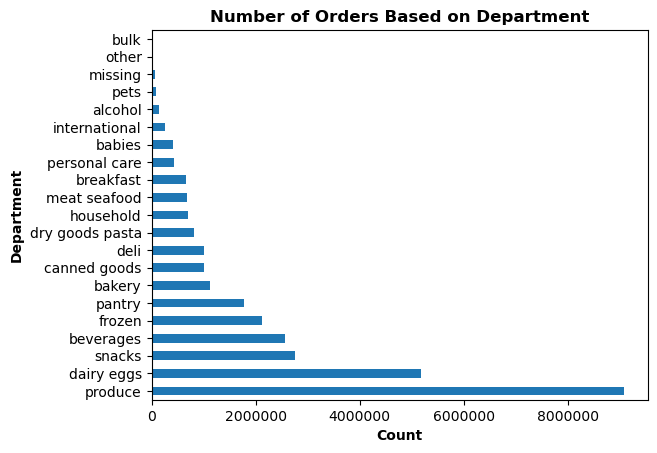

In [53]:
# Creating horizontal bar chart to show frequency of products ordered 
bar_products = ords_prods_entire['department_name'].value_counts().plot.barh()
plt.title('Number of Orders Based on Department', fontweight='bold')
plt.xlabel('Count', fontweight='bold')
plt.ylabel('Department', fontweight='bold')
plt.ticklabel_format(style='plain', axis='x')

In [54]:
# Exporting bar chart
bar_products.figure.savefig(r'/Users/suzandiab/Documents/Instacart Basket Analysis/04 Analysis/Visualizations/bar_product_orders.png', bbox_inches='tight')

In [55]:
# Group by 'customer_profiles' and 'department_name'
grouped_df3 = ords_prods_entire.groupby(['department_name', 'customer_profiles']).size().unstack(fill_value=0)

In [56]:
# Sorting values
sorted_df3 = grouped_df3.loc[grouped_df3.sum(axis=1).sort_values(ascending=True).index]  

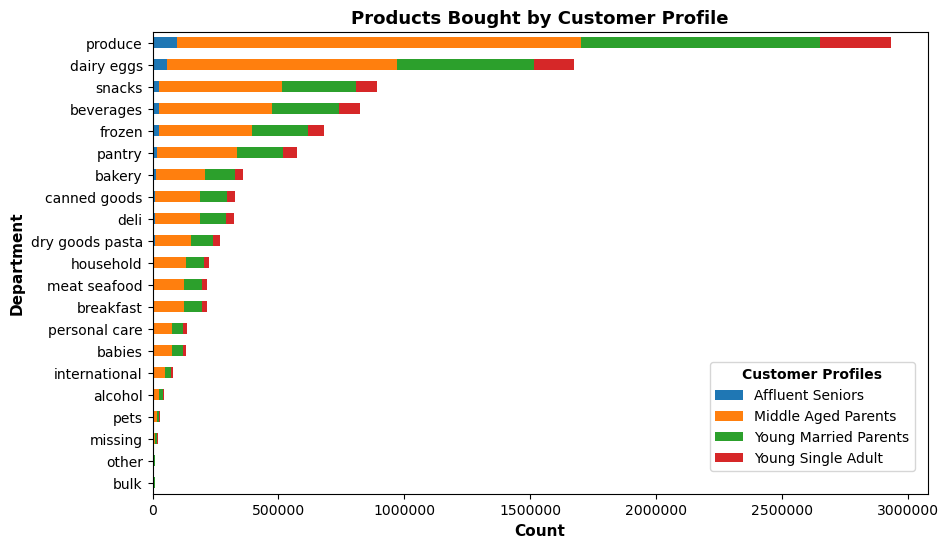

In [57]:
# Creating a stacked bar chart that displays customer profiles and products ordered
sorted_df3.plot(kind='barh', stacked=True, figsize=(10, 6))
plt.xlabel('Count', fontweight='bold', fontsize=11)
plt.ylabel('Department', fontweight='bold', fontsize=11)
plt.title('Products Bought by Customer Profile', fontweight='bold', fontsize=13)
legend = plt.legend(title='Customer Profiles', bbox_to_anchor=(0.71, 0.3), loc='upper left')
legend.get_title().set_fontweight('bold')
plt.ticklabel_format(style='plain', axis='x')
plt.savefig(r'/Users/suzandiab/Documents/Instacart Basket Analysis/04 Analysis/Visualizations/bar_customer_dept.png',
            bbox_inches='tight')
plt.show()

We can see that produce (4) is purchased the most and bulk (10) is purchased the least between the customer profiles.

## Comparing customer profile with department (normalized)

In [58]:
# Group by 'customer_profiles' and 'department_name'
grouped_df4 = ords_prods_entire.groupby(['department_name', 'customer_profiles']).size().unstack(fill_value=0)

In [59]:
# Normalize each row to convert to percentage
normalized_df4 = grouped_df4.div(grouped_df4.sum(axis=1), axis=0) * 100

In [60]:
# Sort values
sorted_df4 = normalized_df4.loc[normalized_df4.sum(axis=1).sort_values(ascending=False).index]

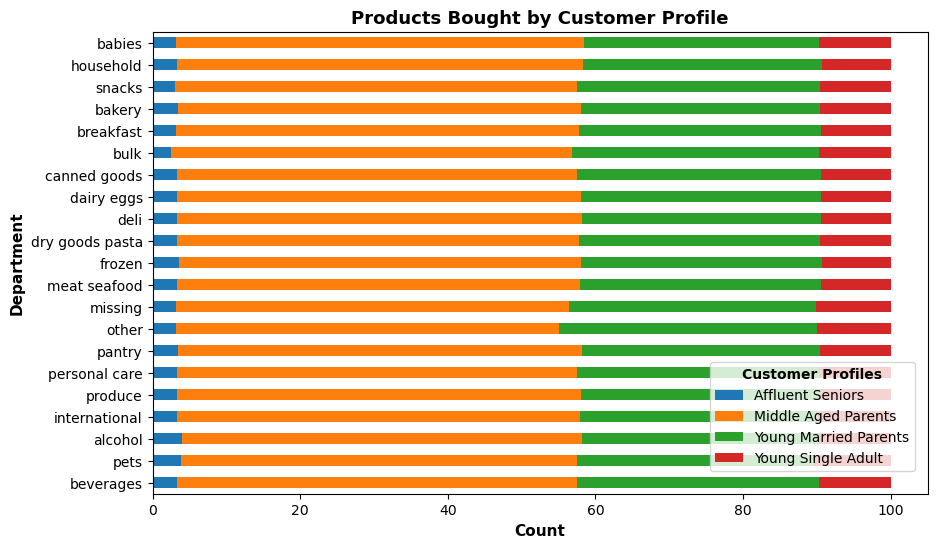

In [61]:
# Creating a stacked bar chart that displays customer profiles and products ordered
sorted_df4.plot(kind='barh', stacked=True, figsize=(10, 6))
plt.xlabel('Count', fontweight='bold', fontsize=11)
plt.ylabel('Department', fontweight='bold', fontsize=11)
plt.title('Products Bought by Customer Profile', fontweight='bold', fontsize=13)
legend = plt.legend(title='Customer Profiles', bbox_to_anchor=(0.71, 0.3), loc='upper left')
legend.get_title().set_fontweight('bold')
plt.ticklabel_format(style='plain', axis='x')
plt.savefig(r'/Users/suzandiab/Documents/Instacart Basket Analysis/04 Analysis/Visualizations/bar_customer_dept_norm.png',
            bbox_inches='tight')
plt.show()

# Exercise 1.10

## Exporting data frame

In [62]:
#Exporting df 
ords_prods_entire.to_pickle(r'/Users/suzandiab/Documents/Instacart Basket Analysis/02 Data/Prepared Data/ords_prods_entire.pkl')